In [44]:
import numpy as np
import matplotlib.pyplot as plt

A_ACTIONS=[0,1] #right,left
B_ACTIONS=range(0,10)
ACTIONS = [A_ACTIONS, B_ACTIONS]

#state A,B,terminal
A,B,T=0,1,2 
STATES=[A,B]

START=A

In [46]:
def step(s,a):
    
    if s==A:
        if a==0: #right
            return T,0,True
        else: #left
            s_=B
            return s_,0,False     
    else: #s==B whatever action may lead to Terminal and random Reward 
        return T,np.random.normal(-0.1,1),True

In [26]:
step(A,0)

(2, 0, True)

In [27]:
step(A,1)

(1, 0, False)

In [39]:
step(B,5)

(2, -0.4211440361614621, True)

In [59]:
def e_greedy(eps,q,s):
    
    if (np.random.random()<=eps):
        if s==A:
            return np.random.choice(A_ACTIONS)
        else:
            return np.random.choice(B_ACTIONS)
    else:
        return np.random.choice([a for a, qs in enumerate(q[s]) if qs==np.max(q[s])])
    
    

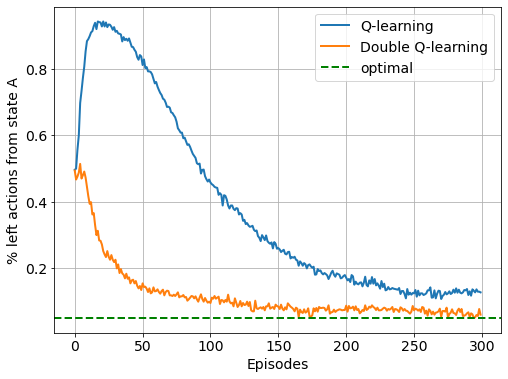

In [133]:
def run_q(double=False,n_eps=300,eps=.1,lr=0.1,gm=1.):

    if not double:
        Q=[np.zeros(len(A_ACTIONS)),np.zeros(len(B_ACTIONS)),np.zeros(1)]
    else:
        Q1=[np.zeros(len(A_ACTIONS)),np.zeros(len(B_ACTIONS)),np.zeros(1)]
        Q2=[np.zeros(len(A_ACTIONS)),np.zeros(len(B_ACTIONS)),np.zeros(1)]
        
    r_all,stp_all,left_all=[],[],[]

    for ep in range(n_eps):

        r_sum,done=0,False
        s=START    
        stp_cnt=0
        left_cnt=0
        
        while not done:
            
            if not double:
                a=e_greedy(eps,Q,s) 
            else:
                a=e_greedy(eps,[q1+q2 for q1,q2 in zip(Q1,Q2)],s)
                
            if s==A and a==1:
                left_cnt+=1
            if s==A:
                stp_cnt+=1
            
            s_,r,done=step(s,a)
            
            if not double:
                delta=r+gm*np.max(Q[s_])-Q[s][a]
                Q[s][a]+=lr*delta
            else:
                if np.random.choice([0,1])==1:
                    a_max=np.random.choice([a for a, q in enumerate(Q1[s_]) if q==np.max(Q1[s_])])
                    delta=r+gm*Q2[s_][a_max]-Q1[s][a]
                    Q1[s][a]+=lr*delta
                else:
                    a_max=np.random.choice([a for a, q in enumerate(Q2[s_]) if q==np.max(Q2[s_])])
                    delta=r+gm*Q1[s_][a_max]-Q2[s][a]
                    Q2[s][a]+=lr*delta
            
            s=s_
            r_sum+=r            

        r_all.append(r_sum)
        stp_all.append(stp_cnt)
        left_all.append(left_cnt)

        #if ep%10==0:
        #    print(f'ep:{ep}, stps:{stp}, ret:{r_sum}')
    if not double:
        return Q,r_all,left_all,stp_all
    else:
        return Q1,Q2,r_all,left_all,stp_all

n_runs=1000

left_all=[]
stp_all=[]
for n in range(n_runs):
    Q,r_q,left,stp=run_q()
    left_all.append(left)
    stp_all.append(stp)

plt.figure(figsize=(8,6))
plt.rcParams['font.size']='14'
plt.plot((np.array(left_all)/np.array(stp_all)).mean(axis=0),label='Q-learning',linewidth=2)

left_all=[]
stp_all=[]
for n in range(n_runs):
    Q1,Q2,r_dq,left,stp=run_q(double=True)
    left_all.append(left)
    stp_all.append(stp)

plt.plot((np.array(left_all)/np.array(stp_all)).mean(axis=0),label='Double Q-learning',linewidth=2)
plt.axhline(0.05,color='g',linestyle='--',label='optimal',linewidth=2)
plt.legend()
plt.grid()

plt.xlabel('Episodes')
plt.ylabel('% left actions from state A')
plt.savefig('doubleq_maxbias.png',dpi=350)


In [130]:
Q

[array([ 0.        , -0.02813768]),
 array([-0.12082077, -0.21405671, -0.15668616, -0.16293318, -0.11727638,
        -0.07702429, -0.17816819, -0.12861351, -0.22436745, -0.2332107 ]),
 array([0.])]

In [131]:
Q1

[array([ 0.        , -0.09921802]),
 array([ 0.        ,  0.        ,  0.        ,  0.30251406,  0.        ,
         0.        ,  0.10357987,  0.        , -0.1247181 ,  0.        ]),
 array([0.])]

In [132]:
Q2

[array([ 0.        , -0.04721003]),
 array([-0.17424552, -0.12043428, -0.11706488, -0.04851982, -0.10130022,
        -0.05552922, -0.31376365, -0.05381979,  0.03486099, -0.0886627 ]),
 array([0.])]

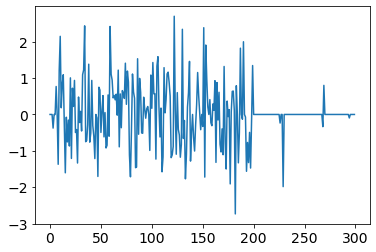

In [135]:
plt.plot(r_q)

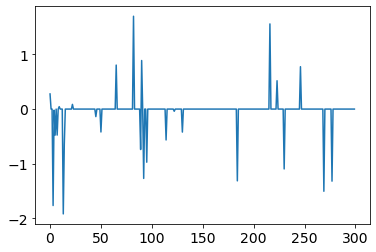

In [136]:
plt.plot(r_dq)